In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from sklearn.preprocessing import OneHotEncoder

from joblib import dump,load
#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_csv("zomato.csv",encoding='latin-1')
df2 = pd.read_excel("Country-Code.xlsx")
df = pd.merge(df1,df2)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [5]:
# Checking the dimension of dataset
df.shape

(9551, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

14 are object datatype and 5 are numarical data. For all columns, all are non-null value

In [11]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

Here Switch to order menu have 1 value for total dataset. Let's drop it.

Restaurant ID have different value for every different entries. Drop this column.

In [12]:
df.drop(["Restaurant ID", 'Switch to order menu'], axis=1, inplace= True)

In [13]:
df.isin(['?']).sum().any()

False

In [14]:
#Checking null values
df.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

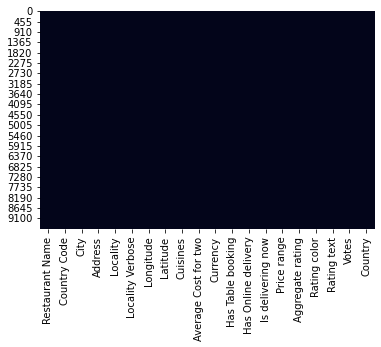

In [15]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [17]:
df.Cuisines.value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

we will replace nan valu with north indian

In [19]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)

In [20]:
#Checking null values
df.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

now we dont have nul value

In [22]:
# looking at the unique values of the columns
for i in df:
    print (f"Column:{i}\nNumber of unique values:{df[i].nunique()}\nUnique values and counts:\n{df[i].value_counts()}" + '\n' +
           '-'*50+'\n')

Column:Restaurant Name
Number of unique values:7446
Unique values and counts:
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64
--------------------------------------------------

Column:Country Code
Number of unique values:15
Unique values and counts:
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64
--------------------------------------------------

Column:City
Number of unique values:141
Unique values and counts:
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad   

In [23]:
# understanding the target variables
print(df['Average Cost for two'].nunique(),'\n',
     df['Price range'].unique()) 

140 
 [3 4 2 1]


Average Cost for two → includes continuous numbers and will therefor require a regression model.
Price range → has 4 unique values and will therefore require a classification model.

In [24]:
df.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


From the above description we can observe the following things.

Here the counts of all the columns are equal which means there are no missing values in the dataset.

And some of the columns have equal mean and median that means the data symmetric and is normally distributed and no skewness present.

There is a huge difference in 75% and max it shows that huge outliers present in the columns.

In [26]:
# Checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)
print("\n")

# Checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)
print("\n")

Categorical columns are:
 ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Country']


Numerical columns are:
 ['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']




# Data Visualization

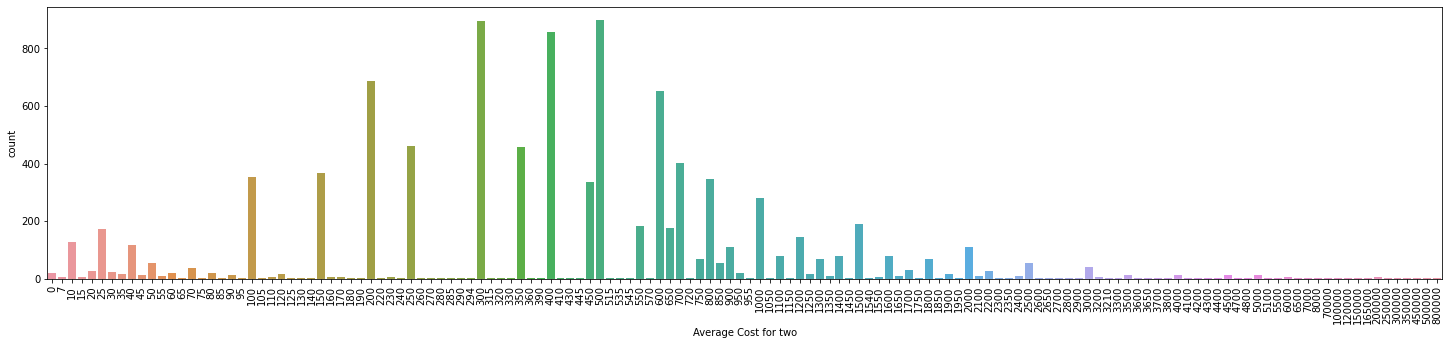

In [30]:

plt.figure(figsize=(25,5))
sns.countplot(df["Average Cost for two"])
plt.xticks(rotation=90)
plt.show()


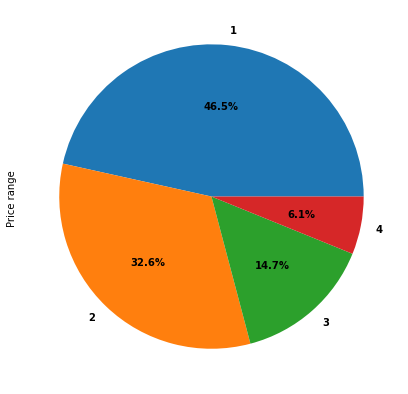

In [31]:

plt.subplots(figsize=(8,7))
df['Price range'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.ylabel( 'Price range ')
plt.show()

it seem that our target variable is imbalanced we will balanced it in further process

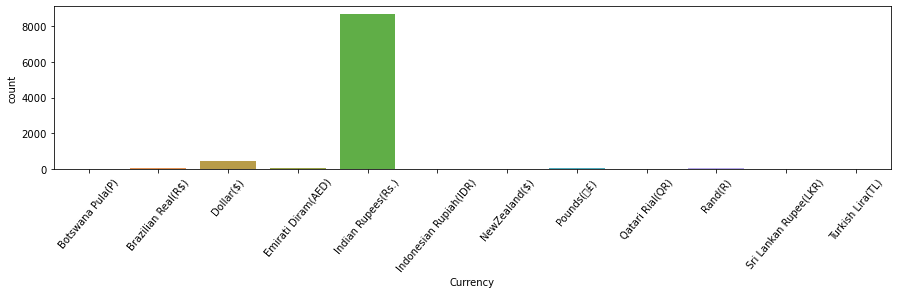

In [32]:
plt.figure(figsize=(15,3))
sns.countplot(df["Currency"])
plt.xticks(rotation=50)
plt.show()

We can see, Indian Rupees is most used currecny. It means that zomato has main business in India followed by Dollar.
Remaining all has no such used, it means zomato is yet to grow in other country as zomato does in India.

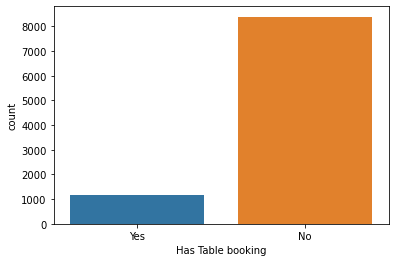

In [34]:
sns.countplot(x='Has Table booking',data=df)
plt.show()

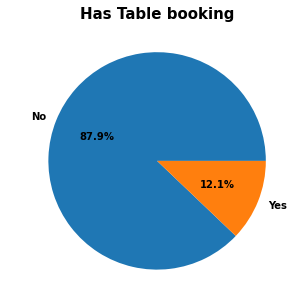

In [37]:
plt.subplots(figsize=(8,5))
df['Has Table booking'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.title('Has Table booking', fontsize=15,fontweight ='bold')
plt.ylabel( ' ')
plt.show()

Around 88% customers are not using Table_booking

12% customer has booked their table.

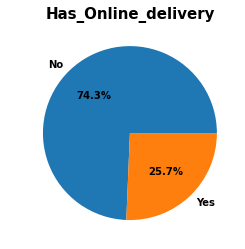

In [38]:
df['Has Online delivery'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.title('Has_Online_delivery', fontsize=15,fontweight ='bold')
plt.ylabel( ' ')
plt.show()

Around 75% customer has online delivery option.

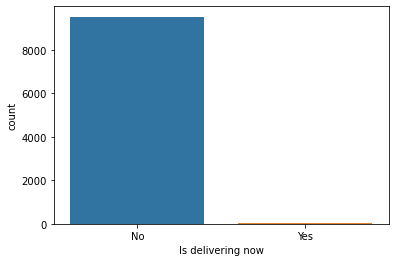

In [39]:
sns.countplot(x='Is delivering now',data=df)
plt.show()

Most of the places has not available is delivery Now option

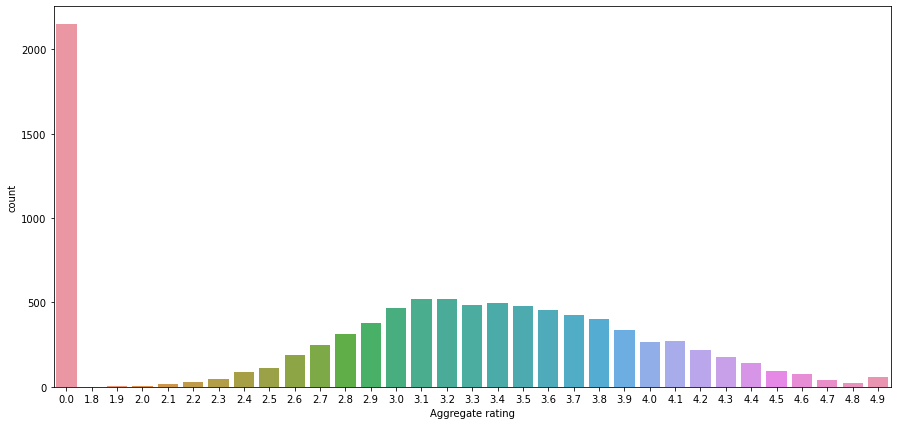

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(x='Aggregate rating',data=df)
plt.show()

Most of the coustomer has gives 0 aggregate rating than others.
3.1 and 3.2 is most given rating after a 0 aggregate rating.

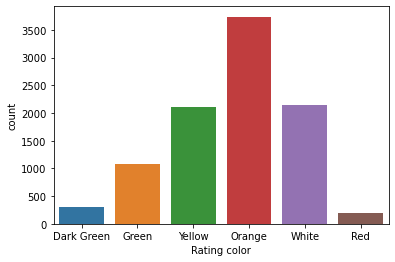

In [42]:
sns.countplot(x='Rating color',data=df)
plt.show()

Maximum Rating_text is Average


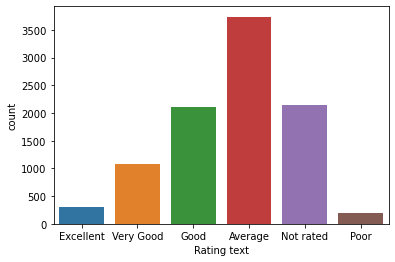

In [44]:
sns.countplot(x='Rating text',data=df)
plt.show()

In rating text, Average is the most used test followed by good.
But some of customer are not rated the zomato service.
Very few customers gives poor rating.

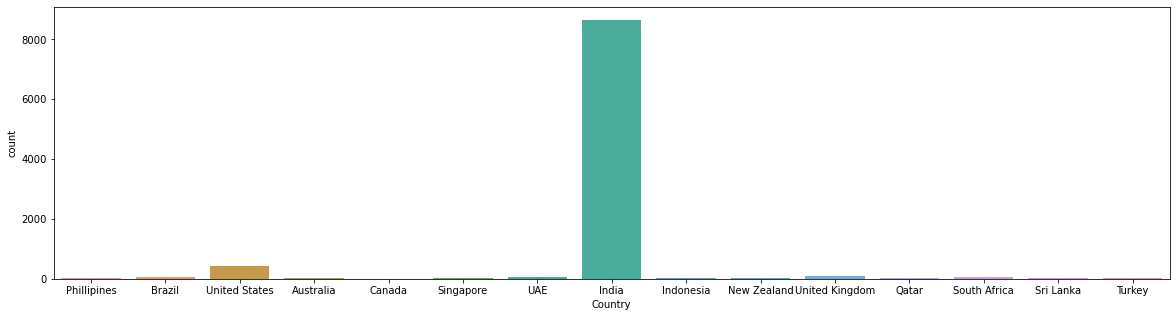

In [46]:
plt.figure(figsize=(20,5))
sns.countplot(x='Country',data=df)
plt.show()

As we observed before that Indian currency is most used. It because of in India is the country where  Zomato businees is highest followed by USA.

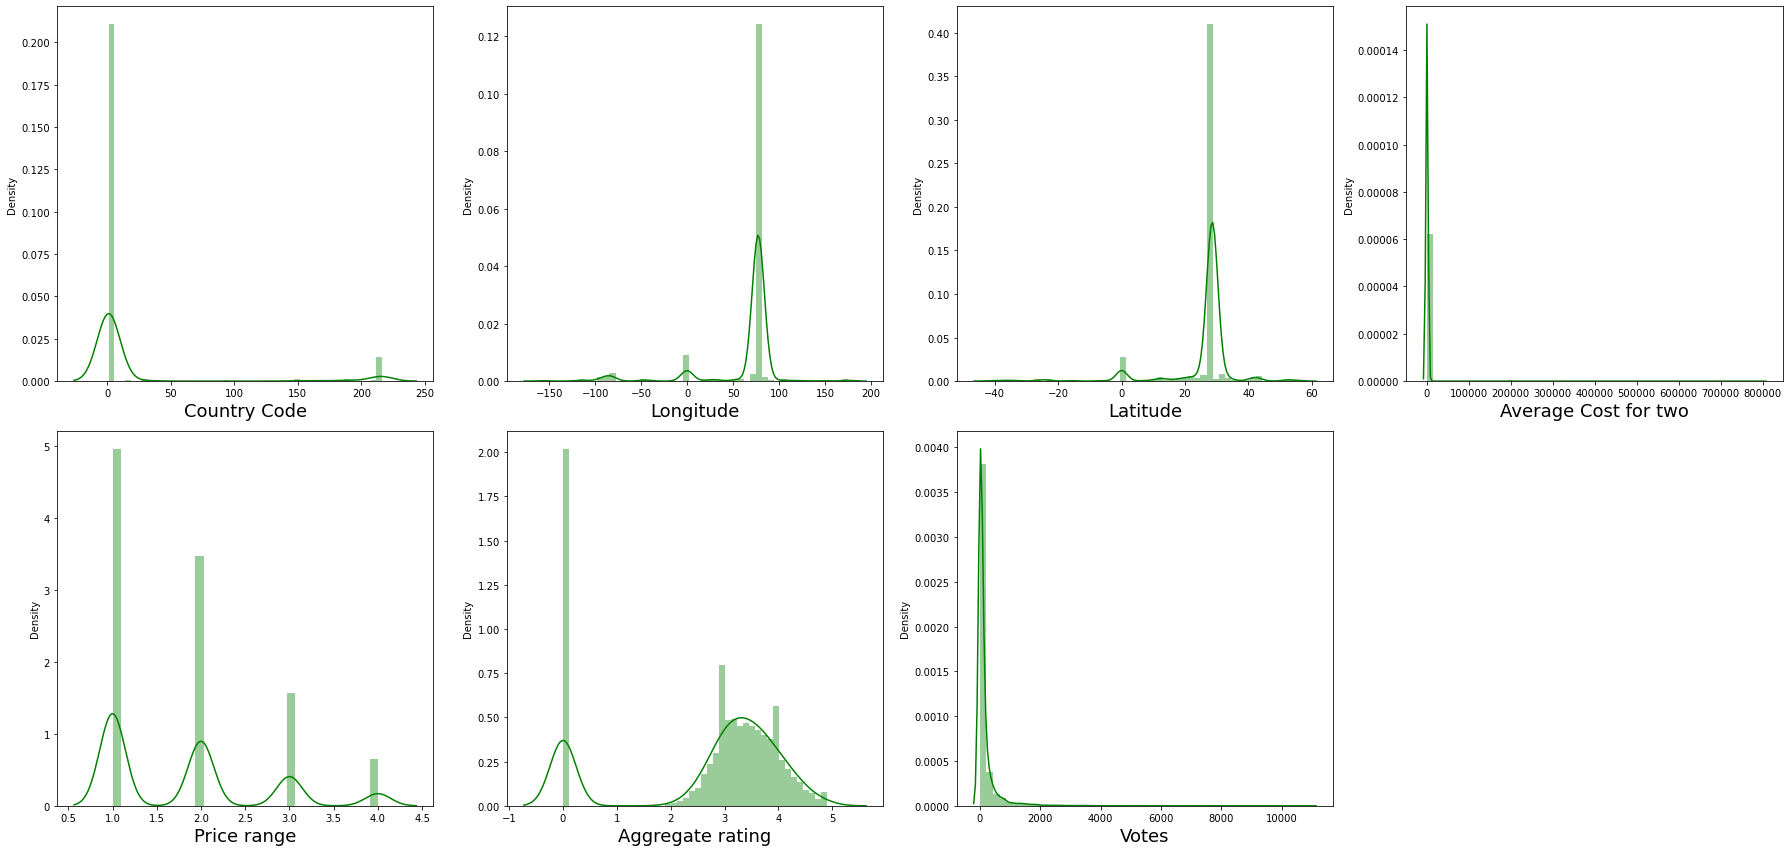

In [73]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="green")
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.tight_layout()

# Bivariate Analysis:

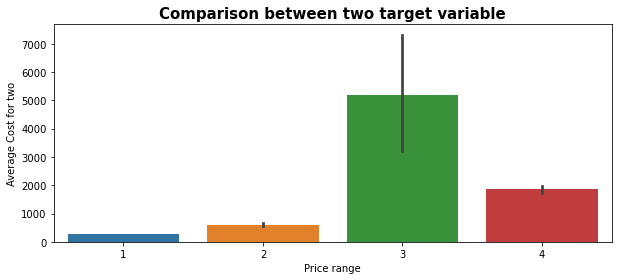

In [57]:
plt.figure(figsize=(10,4))
sns.barplot(y = "Average Cost for two", x= "Price range", data = df)
plt.title('Comparison between two target variable', fontsize=15, fontweight='bold')
plt.show()

 Maximum Average_Cost_for_two is for orice range 3.

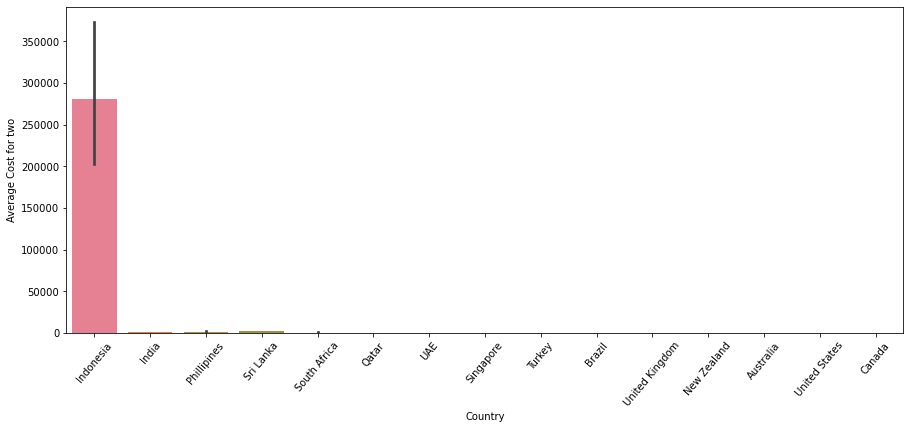

In [60]:
plt.figure(figsize=(15,6))
df_good = df.sort_values(by="Average Cost for two",ascending=False)
sns.barplot(x="Country",y="Average Cost for two",data=df_good,palette="husl")
plt.xticks(rotation=50)
plt.show()

We can see, Indonesia has high Average cost for two. It means that Indonesia has high cost of food than others.
Rest of all having low avwerage cost for two.

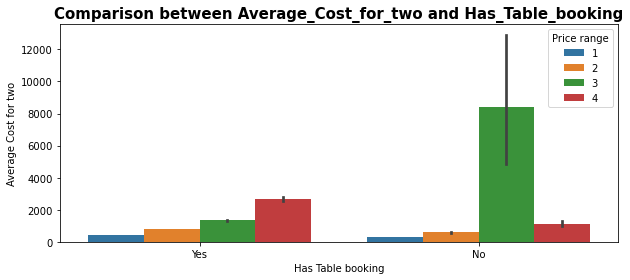

In [62]:
plt.figure(figsize=(10,4))
sns.barplot(y = "Average Cost for two", x= "Has Table booking", data = df, hue= 'Price range')
plt.title('Comparison between Average_Cost_for_two and Has_Table_booking', fontsize=15, fontweight='bold')
plt.show()

the restaurant with price range level 4 have maximum table booking. The customers who have decided to go for a high price restaurent, booked their table previously

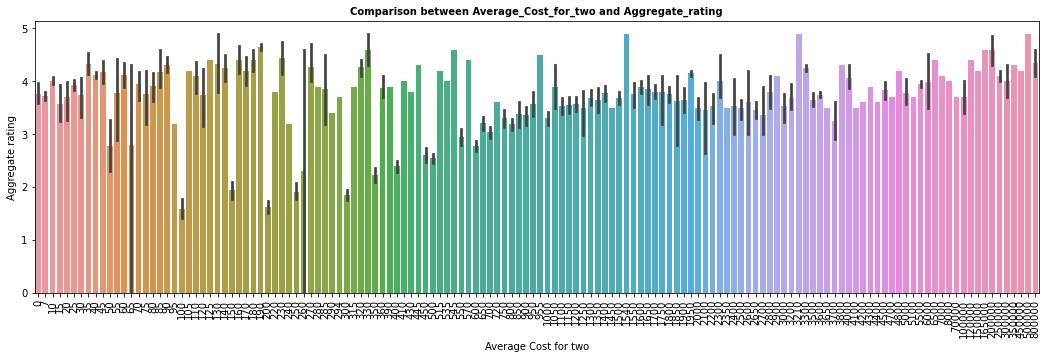

In [65]:
plt.figure(figsize=(18,5))
sns.barplot(x = "Average Cost for two", y = "Aggregate rating", data = df)
plt.title('Comparison between Average_Cost_for_two and Aggregate_rating', fontsize=10, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

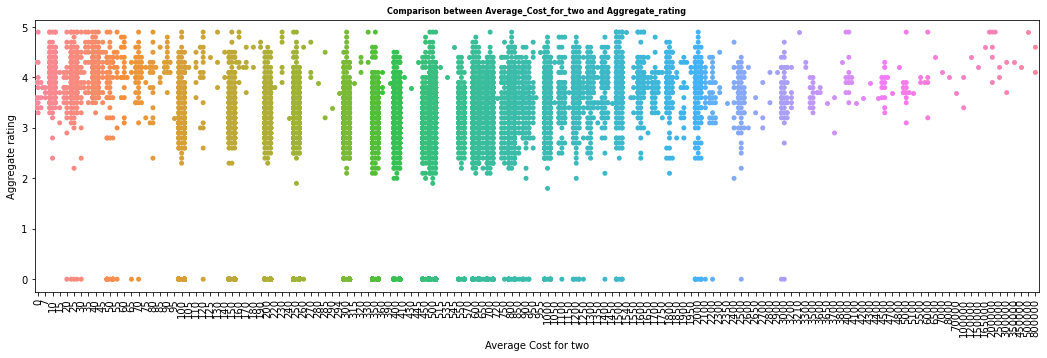

In [66]:
plt.figure(figsize=(18,5))
sns.swarmplot(x = "Average Cost for two", y = "Aggregate rating", data = df)
plt.title('Comparison between Average_Cost_for_two and Aggregate_rating', fontsize=8, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

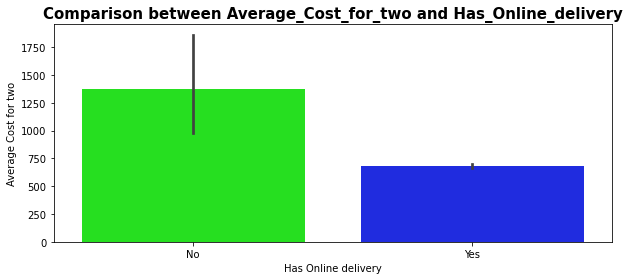

In [68]:
plt.figure(figsize=(10,4))
sns.barplot(y = "Average Cost for two", x= "Has Online delivery", data = df,palette="hsv")
plt.title('Comparison between Average_Cost_for_two and Has_Online_delivery', fontsize=15, fontweight='bold')
plt.show()

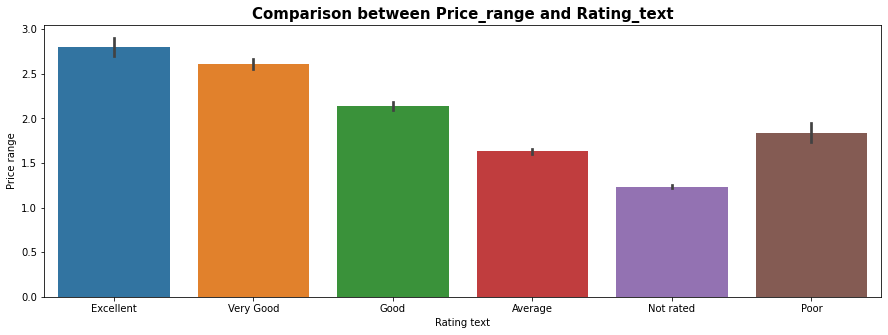

In [69]:
plt.figure(figsize=(15,5))
sns.barplot(y = "Price range", x= "Rating text", data = df)
plt.title('Comparison between Price_range and Rating_text', fontsize=15, fontweight='bold')
plt.show()

price range with excellent text is highest

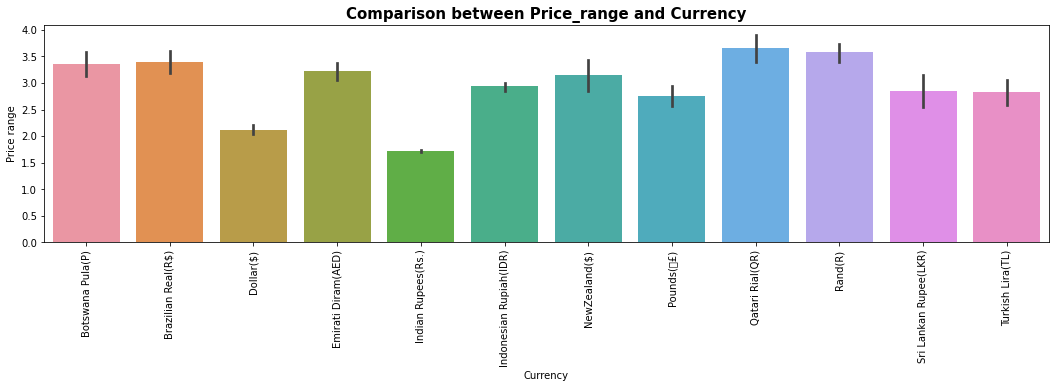

In [70]:
plt.figure(figsize=(18,4))
sns.barplot(y = "Price range", x= "Currency", data = df)
plt.title('Comparison between Price_range and Currency', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

Prics range is low for Indian Rupees

Prics range is high for Qatari Rial

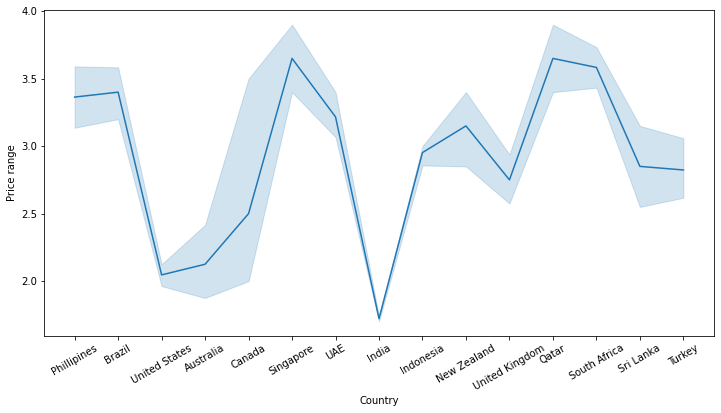

In [71]:
# plottin gthe price ranges with respect to the country
plt.figure(figsize=(12,6))
sns.lineplot(x="Country",y='Price range',data=df)
plt.xticks(rotation=30)
plt.show()

According to the above plot the price ranges are relatively high in Singapore and Qatar.
The prices are the lowest in United States, India and Australia.

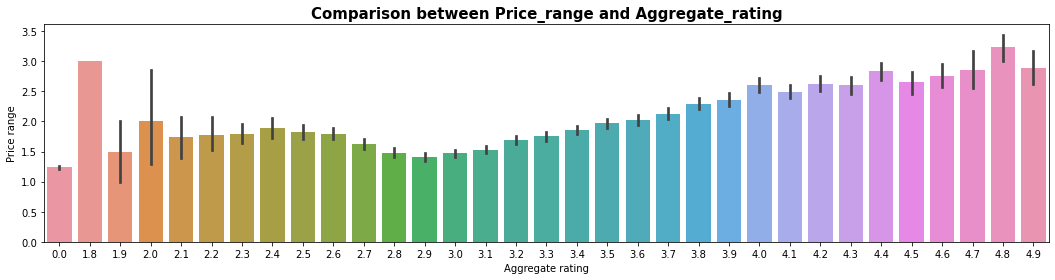

In [72]:
plt.figure(figsize=(18,4))
sns.barplot(y = "Price range", x= "Aggregate rating", data = df)
plt.title('Comparison between Price_range and Aggregate_rating', fontsize=15, fontweight='bold')
plt.show()

If Price_range is high, Aggregate_rating is also high.

Max price is for 4.8 ratings

# Identifying the Outliers

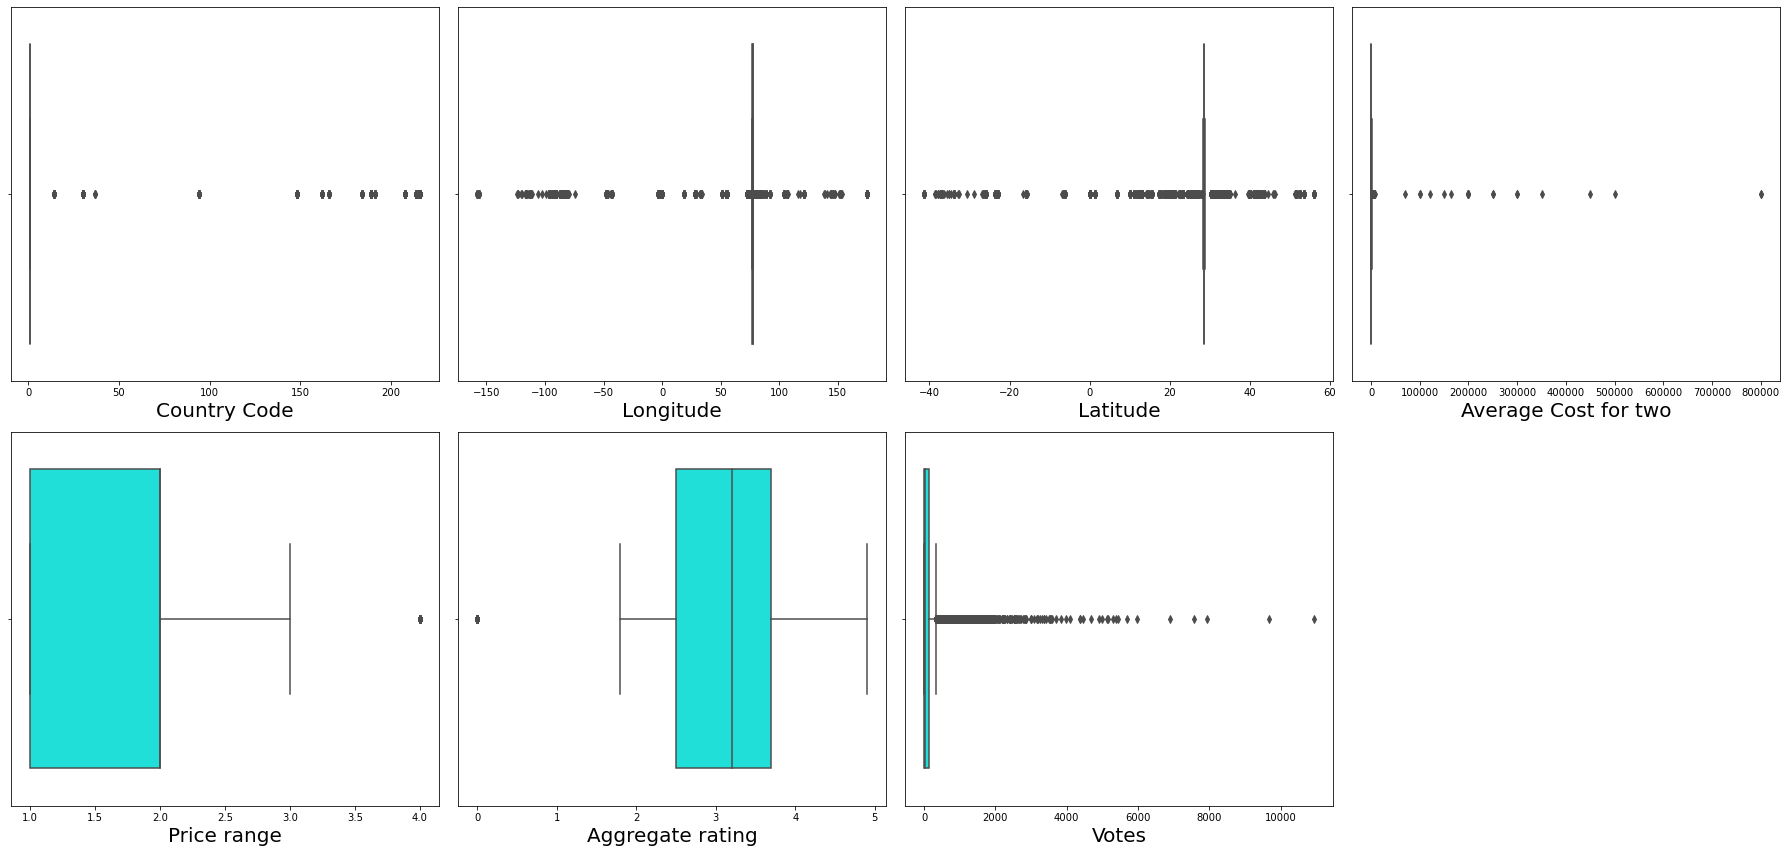

In [74]:
# Lets check the outliers by plotting boxplot
plt.figure(figsize=(25,35),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=23:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[col],palette="hsv")
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From Boxplot we can see outliers exist in dataset.

In [75]:
from scipy.stats import zscore
features = df[["Country Code","Longitude","Latitude","Aggregate rating","Votes","Average Cost for two"]]
z = np.abs(zscore(features))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (9551, 20)
Shape of the dataframe after removing outliers:  (8565, 20)
Percentage of data loss post outlier removal:  10.323526332321222


In [76]:
df[numerical_col].skew()

Country Code            11.593933
Longitude               -3.529965
Latitude                -3.180873
Average Cost for two     3.718671
Price range              1.029231
Aggregate rating        -0.877262
Votes                    3.653843
dtype: float64

we will not remove skewness of our targets

In [77]:
skew_data =['Latitude', 'Longitude', 'Aggregate rating','Country Code','Votes']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

df[skew_data] = scaler.fit_transform(df[skew_data].values)
df[skew_data].skew()

Latitude            -2.531937
Longitude           -0.249360
Aggregate rating    -0.631024
Country Code        11.532839
Votes               -0.008984
dtype: float64

skewness is not removed but it get reduced

In [78]:
#Encoding the catgorical data
from sklearn.preprocessing import LabelEncoder

lbl=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(lbl.fit_transform)

In [79]:
df.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3321,11.616899,27,7731,98,99,7.096817,-2.870154,657,1100,0,1,0,0,3,1.972392,0,1,1.410787,2
1,2794,11.616899,27,5244,376,384,7.094048,-2.870996,783,1200,0,1,0,0,3,1.649065,0,1,1.753948,2
2,2550,11.616899,28,3955,185,191,7.102859,-2.869007,1271,4000,0,1,0,0,4,1.543945,1,5,1.329422,2
3,4150,11.616899,28,7736,549,562,7.102785,-2.868725,794,1500,0,0,0,0,4,2.082799,0,1,1.492117,2
4,4878,11.616899,28,7735,549,562,7.102998,-2.868788,793,1500,0,1,0,0,4,1.972392,0,1,1.240914,2


In [80]:
#Corrleation
df.corr()


,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant Name,1.000000,0.012685,0.008530,0.001829,0.008659,0.008637,0.019722,0.005493,0.060831,0.051725,0.000797,0.041460,0.031505,0.013050,0.064842,0.028976,-0.007253,0.007538,0.038778,0.007505
Country Code,0.012685,1.000000,0.020689,-0.021613,-0.028893,-0.028208,0.292598,-0.202920,-0.020096,0.010554,-0.210036,0.029633,-0.053197,-0.005434,0.184160,0.103545,-0.069728,0.037943,0.075480,0.960105
City,0.008530,0.020689,1.000000,-0.095810,-0.029670,-0.033822,0.054221,0.081057,0.014873,-0.059545,-0.134651,-0.002165,-0.017478,-0.023878,-0.110052,-0.109620,0.067731,-0.055647,-0.097033,0.030770
Address,0.001829,-0.021613,-0.095810,1.000000,0.150581,0.152337,-0.024416,0.018040,-0.016180,0.054153,0.011598,-0.010811,-0.008224,0.029266,-0.018561,-0.098629,0.056251,0.048478,-0.128155,-0.031028
Locality,0.008659,-0.028893,-0.029670,0.150581,1.000000,0.999002,-0.026209,0.017092,-0.015087,-0.041655,-0.010129,-0.070155,-0.049229,-0.011218,-0.100585,-0.155147,0.006835,-0.000465,-0.178258,-0.031437
Locality Verbose,0.008637,-0.028208,-0.033822,0.152337,0.999002,1.000000,-0.027072,0.016162,-0.016232,-0.038586,-0.008717,-0.069131,-0.049567,-0.011166,-0.097496,-0.153900,0.007440,0.001245,-0.176254,-0.030599
Longitude,0.019722,0.292598,0.054221,-0.024416,-0.026209,-0.027072,1.000000,0.579900,0.004392,0.073071,-0.354945,0.079615,0.105109,0.011096,0.084134,0.175121,-0.104827,-0.077165,0.186750,0.232608
Latitude,0.005493,-0.202920,0.081057,0.018040,0.017092,0.016162,0.579900,1.000000,0.038402,-0.012364,0.116663,0.050272,0.160799,0.022612,-0.127028,-0.027884,-0.006377,-0.185071,-0.018102,-0.196182
Cuisines,0.060831,-0.020096,0.014873,-0.016180,-0.015087,-0.016232,0.004392,0.038402,1.000000,0.006327,0.029270,0.039859,-0.039823,0.005151,0.020264,-0.056096,-0.047689,-0.061127,-0.029703,-0.021027
Average Cost for two,0.051725,0.010554,-0.059545,0.054153,-0.041655,-0.038586,0.073071,-0.012364,0.006327,1.000000,-0.067872,0.617051,0.062763,0.009316,0.813657,0.350264,-0.033294,0.095707,0.424192,-0.012355


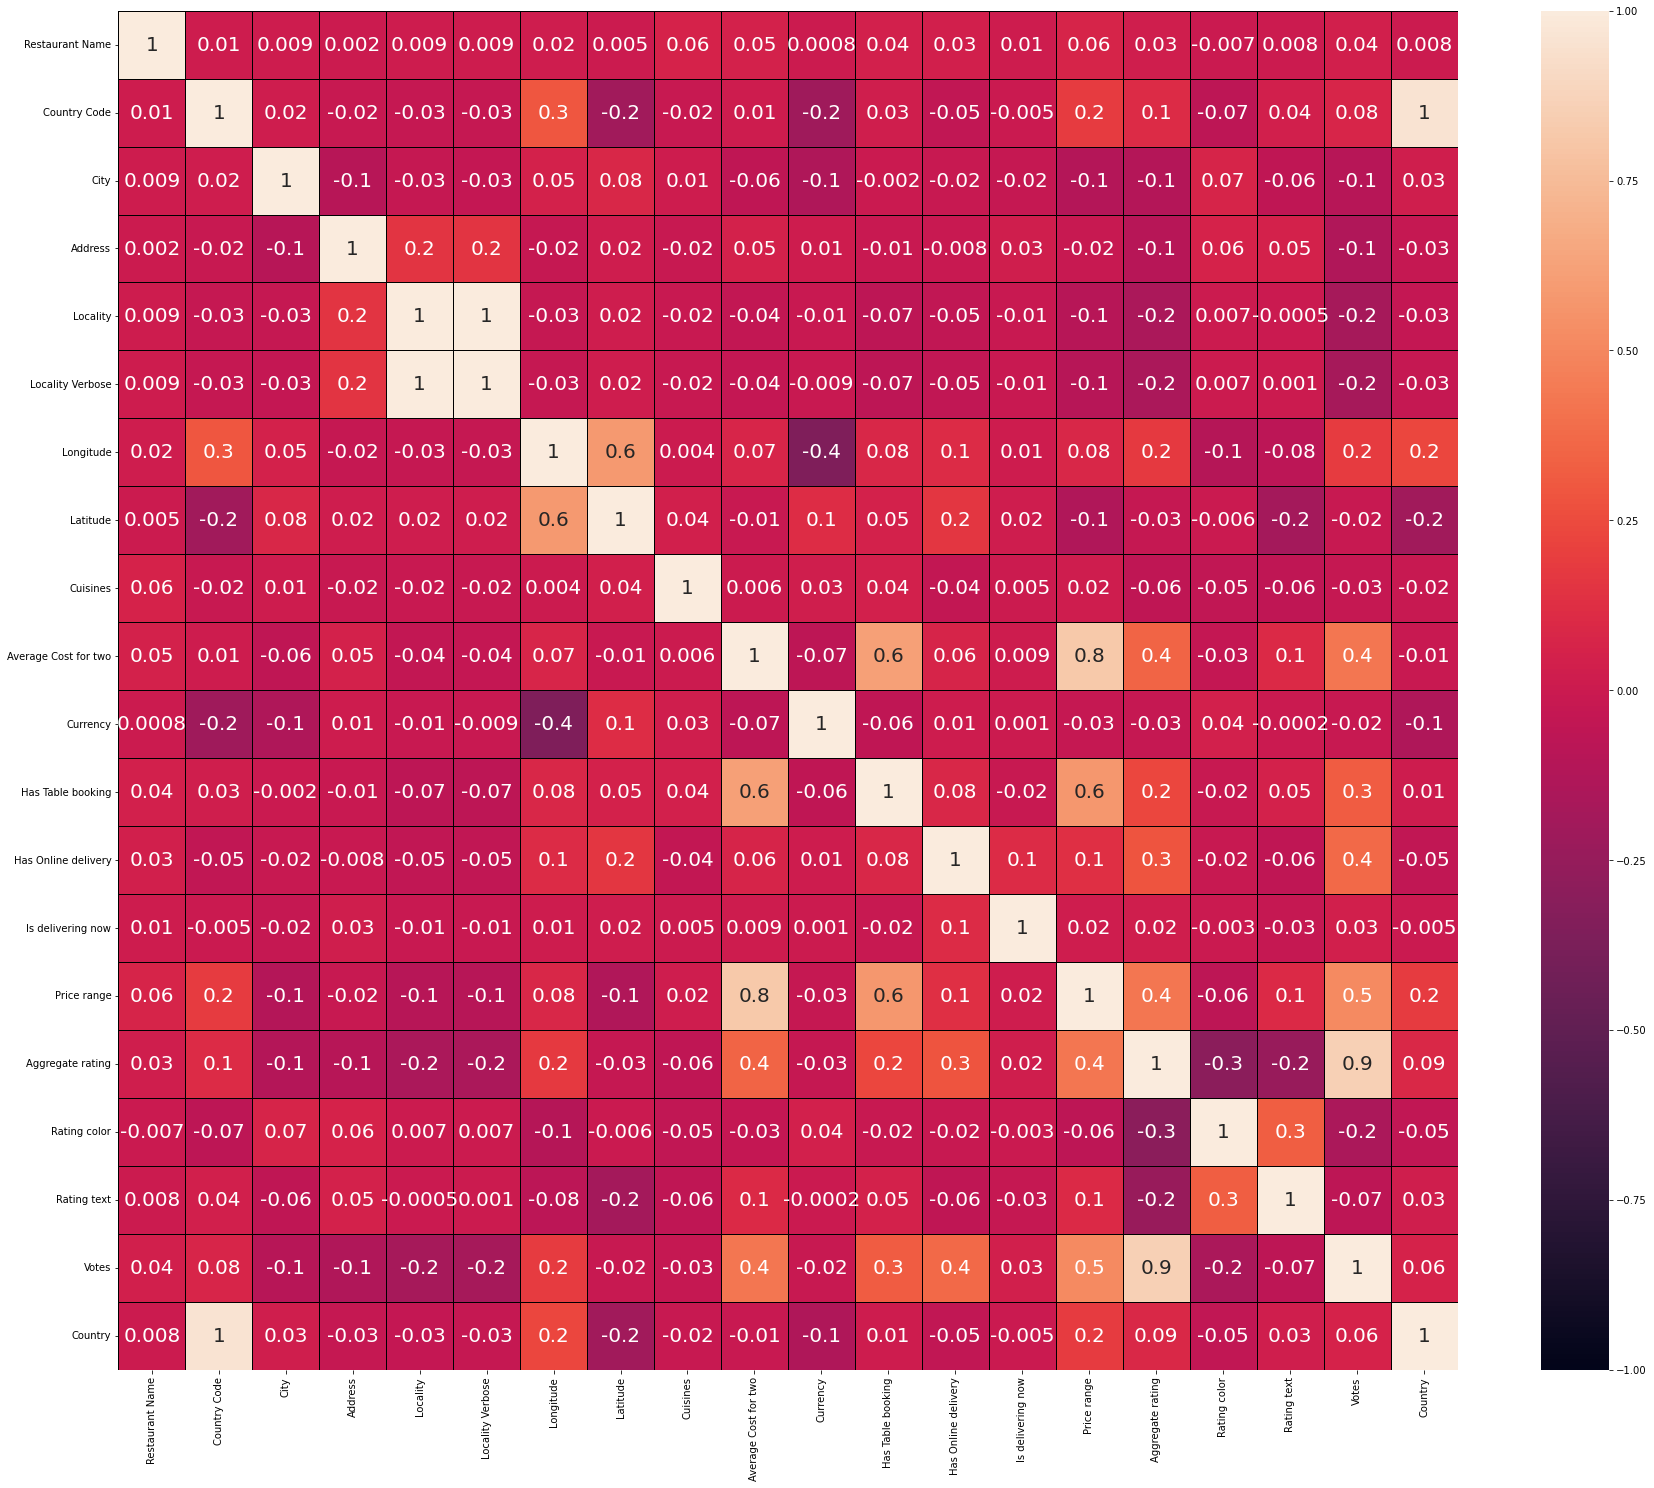

In [85]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),linewidths=.5,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':20})
plt.yticks(rotation=0);

correlation is 1 that is 100% between Locality and Locality_Verbose and country code and country Let's remove one of them
also aggregate rating and votes are highly corelated lets remove one of them

In [86]:
df.drop(['Locality Verbose','Country Code','Votes'], axis=1, inplace =True)

In [87]:
#Separating features and label

In [89]:
x = df.drop(['Average Cost for two'], axis =1)
y = df['Average Cost for two']

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X.head()

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Country
0,0.052689,-0.498280,1.612139,-1.603037,7.096817,-2.870154,-0.166259,-13.447769,2.652303,-0.617978,-0.063131,1.506693,1.972392,-2.203028,-0.396310,7.570045
1,-0.226145,-0.498280,0.523697,-0.280920,7.094048,-2.870996,0.148814,-13.447769,2.652303,-0.617978,-0.063131,1.506693,1.649065,-2.203028,-0.396310,7.570045
2,-0.355245,-0.381656,-0.040436,-1.189281,7.102859,-2.869007,1.369094,-13.447769,2.652303,-0.617978,-0.063131,2.679006,1.543945,-1.483690,2.085425,7.570045
3,0.491312,-0.381656,1.614327,0.541836,7.102785,-2.868725,0.176320,-13.447769,-0.377031,-0.617978,-0.063131,2.679006,2.082799,-2.203028,-0.396310,7.570045
4,0.876496,-0.381656,1.613889,0.541836,7.102998,-2.868788,0.173820,-13.447769,2.652303,-0.617978,-0.063131,2.679006,1.972392,-2.203028,-0.396310,7.570045


In [91]:
# Checking Multicollinearity between features using variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.009467,Restaurant Name
1,1.079100,City
2,1.045273,Address
3,1.052489,Locality
4,2.849437,Longitude
5,2.653225,Latitude
6,1.024861,Cuisines
7,1.512067,Currency
8,1.568554,Has Table booking
9,1.148826,Has Online delivery


no multicoliniarity issue we are good to go

# Machine Learning Model Building

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [93]:
from sklearn.neighbors import KNeighborsRegressor as KNN

maxAcc = 0
maxRS = 0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=i)
    knn=KNN()
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2_score is ",maxAcc,"at random_state",i)

Maximum r2_score is  0.811829709026326 at random_state 99


In [94]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=maxRS)

# RandomForestRegressor

In [95]:
# checking r2_score for RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
print("R2_score :",r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_RFR))

# Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,pred_RFR))

# Root Mean Squared error(RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_RFR)))

R2_score : 0.8869023421759511
MAE: 109.30799610894944
MSE: 40237.22913910506
RMSE: 200.59219610718924


# Linear Regression

In [96]:
# Checking r2_score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
print("R2_score:",r2_score(y_test,pred_LR))
print("MAE:",metrics.mean_absolute_error(y_test,pred_LR))
print("MSE:",metrics.mean_squared_error(y_test,pred_LR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_LR)))

R2_score: 0.7529282714446496
MAE: 171.69905244159128
MSE: 87901.74745389346
RMSE: 296.48228860067417


# Support Vector Machine Regressor

In [97]:
# checking r2_score for SVR
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print("r2_score:",r2_score(y_test,pred_svr))
print("MAE:",metrics.mean_absolute_error(y_test,pred_svr))
print("MSE:",metrics.mean_squared_error(y_test,pred_svr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_svr)))

r2_score: 0.27276702987437207
MAE: 241.242568025499
MSE: 258730.73076350355
RMSE: 508.65580775560164


# Gradient Boosting Regressor

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred_GB = GB.predict(x_test)
print("R2_score:",r2_score(y_test,pred_GB))
print("MAE:",metrics.mean_absolute_error(y_test,pred_GB))
print("MSE:",metrics.mean_squared_error(y_test,pred_GB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_GB)))

R2_score: 0.8921659605744598
MAE: 115.47245580079496
MSE: 38364.56949542704
RMSE: 195.8687557917981


# Cross Validation Score

In [99]:
# Checking cross valiodation score for RandomForestRegressor
print("Cross_Validation_Score",cross_val_score(RFR,X,y).mean())

Cross_Validation_Score 0.8297210840322717


In [100]:
# Checking cross valiodation score for LinearRegressor
print("Cross_Validation_Score",cross_val_score(LR,X,y).mean())

Cross_Validation_Score -1.298440604472693


In [101]:
# Checking cross valiodation score for SVR
print("Cross_Validation_Score",cross_val_score(svr,X,y).mean())

Cross_Validation_Score 0.30935192588186344


In [102]:
# Checking cross valiodation score for KNNRegressor
print("Cross_Validation_Score",cross_val_score(knn,X,y).mean())

Cross_Validation_Score 0.6738029140275485


In [103]:
# Checking cross valiodation score for GradientBoosting Regressor 
print("Cross_Validation_Score",cross_val_score(GB,X,y).mean())

Cross_Validation_Score 0.8020826967814058


From this we can predict that Random forest regressor is our best fit model

# Hyperparameter Tuning

In [104]:

from sklearn.model_selection import GridSearchCV

In [105]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

grd = GridSearchCV(RandomForestRegressor(),param_grid =grid)
grd.fit(x_train,y_train)
grd.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 18}

In [110]:
Final_mod1 =RandomForestRegressor(n_estimators=500, max_features='sqrt', max_depth=7, random_state=18)
Final_mod1.fit(x_train,y_train)
pred = Final_mod1.predict(x_test)
print("RMSE value :",np.sqrt(metrics.mean_squared_error(y_test,pred_RFR)))
print('R2_score :',r2_score(y_test,pred)*100)

RMSE value : 200.59219610718924
R2_score : 88.23893024278215


# Saving model

In [112]:
import joblib
joblib.dump(Final_mod1,'Zomato_avg_cost.pkl')

['Zomato_avg_cost.pkl']

# Model Building For Predicting Price range (Classification)

In [113]:
x1 = df.drop(columns=['Price range'],axis=1)
y1 = df['Price range']

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
X1.head()

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Country
0,0.052689,-0.498280,1.612139,-1.603037,7.096817,-2.870154,-0.166259,0.832697,-13.447769,2.652303,-0.617978,-0.063131,1.972392,-2.203028,-0.396310,7.570045
1,-0.226145,-0.498280,0.523697,-0.280920,7.094048,-2.870996,0.148814,1.002730,-13.447769,2.652303,-0.617978,-0.063131,1.649065,-2.203028,-0.396310,7.570045
2,-0.355245,-0.381656,-0.040436,-1.189281,7.102859,-2.869007,1.369094,5.763652,-13.447769,2.652303,-0.617978,-0.063131,1.543945,-1.483690,2.085425,7.570045
3,0.491312,-0.381656,1.614327,0.541836,7.102785,-2.868725,0.176320,1.512829,-13.447769,-0.377031,-0.617978,-0.063131,2.082799,-2.203028,-0.396310,7.570045
4,0.876496,-0.381656,1.613889,0.541836,7.102998,-2.868788,0.173820,1.512829,-13.447769,2.652303,-0.617978,-0.063131,1.972392,-2.203028,-0.396310,7.570045


In [115]:
# Checking Multicollinearity between features using variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X1,i) for i in range(len(X1.columns))]
vif["Features"] = X1.columns
vif

,VIF values,Features
0,1.008489,Restaurant Name
1,1.073669,City
2,1.054930,Address
3,1.053404,Locality
4,2.830019,Longitude
5,2.597075,Latitude
6,1.023071,Cuisines
7,1.840587,Average Cost for two
8,1.506181,Currency
9,1.647398,Has Table booking


we are good to go

# Machine Learning Model Building

In [116]:
#Finding best random state:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,500):
    x_train, x_test, y_train, y_test = train_test_split(X1,y1,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.9735408560311284  on Random_State  46


In [119]:
#Creating train_test Split:
x_train, x_test, y_train, y_test = train_test_split(X1,y1,test_size=0.30, random_state=46)

# RandomForestClassifier

In [120]:
# checking accuracy for RandomForestclasifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

score = cross_val_score(RFC,X1,y1)
print('cross vallidation sccore is - ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation mean score is - ",accuracy_score(y_test,predRFC)-score.mean())

Acurracy score is-  0.9891050583657588
[[1259    3    0    0]
 [   7  854    1    0]
 [   0    5  319    2]
 [   0    0   10  110]]
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      1262
           2       0.99      0.99      0.99       862
           3       0.97      0.98      0.97       326
           4       0.98      0.92      0.95       120

    accuracy                           0.99      2570
   macro avg       0.98      0.97      0.98      2570
weighted avg       0.99      0.99      0.99      2570

cross vallidation sccore is -  [0.74722709 0.9655575  0.99883246 1.         0.95855225]
CV mean score is -  0.9340338587273788
Difference between Accracy score and cross validation mean score is -  0.05507119963838003


# Support Vector Machine Classifier

In [121]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


score = cross_val_score(svc,X1,y1)
print('cross validation score is- ',score)
print('cv mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predsvc)-score.mean())

Acurracy score is-  0.9424124513618677
[[1234   28    0    0]
 [  44  805   13    0]
 [   0   33  286    7]
 [   0    0   23   97]]
              precision    recall  f1-score   support

           1       0.97      0.98      0.97      1262
           2       0.93      0.93      0.93       862
           3       0.89      0.88      0.88       326
           4       0.93      0.81      0.87       120

    accuracy                           0.94      2570
   macro avg       0.93      0.90      0.91      2570
weighted avg       0.94      0.94      0.94      2570

cross validation score is-  [0.76298891 0.88324577 0.95271454 0.95621716 0.91593695]
cv mean score is -  0.8942206654991243
Difference between Accracy score and cross validation score is -  0.04819178586274342


# Gradient Boosting Classifier

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGB = GBC.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

score = cross_val_score(GB,X1,y1)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predGB)-score.mean())

Acurracy score is-  0.9883268482490273
[[1258    4    0    0]
 [   3  857    2    0]
 [   0   10  313    3]
 [   0    0    8  112]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1262
           2       0.98      0.99      0.99       862
           3       0.97      0.96      0.96       326
           4       0.97      0.93      0.95       120

    accuracy                           0.99      2570
   macro avg       0.98      0.97      0.98      2570
weighted avg       0.99      0.99      0.99      2570

cross validation score is-  [-0.46066132  0.97259     0.99932019  0.99913363  0.88880128]
CV mean score is -  0.6798367552548136
Difference between Accracy score and cross validation score is -  0.3084900929942137


# AdaBoost Classifier

In [123]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

score = cross_val_score(ABC,X1,y1)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predABC)-score.mean())

Acurracy score is-  0.8252918287937743
[[1262    0    0    0]
 [  17  845    0    0]
 [   0  319    5    2]
 [   0  110    1    9]]
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1262
           2       0.66      0.98      0.79       862
           3       0.83      0.02      0.03       326
           4       0.82      0.07      0.14       120

    accuracy                           0.83      2570
   macro avg       0.83      0.52      0.49      2570
weighted avg       0.85      0.83      0.76      2570

cross validation score is-  [0.26269702 0.82078225 0.83070636 0.83070636 0.82136602]
CV mean score is -  0.7132516053706948
Difference between Accracy score and cross validation score is -  0.11204022342307951


# DecisionTreeClassifier

In [127]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDT = DTC.predict(x_test)
print('Acurracy score is- ',accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

score = cross_val_score(DTC,X1,y1)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(y_test,predDT)-score.mean())

Acurracy score is-  0.9801556420233463
[[1251   11    0    0]
 [   4  846   12    0]
 [   0    6  310   10]
 [   0    0    8  112]]
              precision    recall  f1-score   support

           1       1.00      0.99      0.99      1262
           2       0.98      0.98      0.98       862
           3       0.94      0.95      0.95       326
           4       0.92      0.93      0.93       120

    accuracy                           0.98      2570
   macro avg       0.96      0.96      0.96      2570
weighted avg       0.98      0.98      0.98      2570

cross validation score is-  [0.57034442 0.96322242 0.99941623 0.99941623 0.93345009]
CV mean score is -  0.8931698774080561
Difference between Accracy score and cross validation score is -  0.08698576461529017


# Best Model

Based on the above models we can see that differnce between accuracy score and cross val score is quite less in extra tree and accuracy is 90% so our best model is Randomforest classifier

# Hyper parameter tuning

In [129]:
grids = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

grds = GridSearchCV(RandomForestClassifier(),param_grid =grids)
grds.fit(x_train,y_train)
grds.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 400,
 'random_state': 18}

In [143]:
#Final Model
Final_mod2= RandomForestClassifier(n_estimators= 500, max_depth=7,max_features= 'sqrt',random_state=18)
Final_mod2.fit(x_train,y_train)
y_preds=Final_mod2.predict(x_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_preds))

Accuracy Score :
 0.9801556420233463


# Saving model

In [144]:
import joblib
joblib.dump(Final_mod1,'Zomato_price_range.pkl')

['Zomato_price_range.pkl']

In [145]:
# Prediction on saved model
prediction = Final_mod2.predict(x_test)

Actual = np.array(y_test)

df_Pred = pd.DataFrame()

df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,2,2
1,1,1
2,3,3
3,1,1
4,1,1
